 # Assignment 1-2: Data Collection Using Web APIs

 ## Objective

 Many websites (such as Twitter, Yelp, Spotify) provide free APIs to allow users to access their data. In this assignment, you will learn the following:



 * How to ask insightful questions about data.

 * How to collect data from Web APIs using standard Python libraries.



 **Requirements:**



 1. Use [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) to manipulate data.



 2. Follow the Python code style guide (https://www.python.org/dev/peps/pep-0008/). If your code is hard to read, you may lose points. This requirement will stay for the whole semester.

 ## Preliminary

 To complete this assignment, you will use Python libraries such as:



 - `requests` to make HTTP requests to the API.

 - `json` to parse JSON responses.

 - `pandas` to process and manipulate data.



 Before starting, you can refer to these tutorials:



 * [Python `requests` library](https://realpython.com/python-requests/)

 * [Working with JSON in Python](https://realpython.com/python-json/)

 * [Pandas basics](https://pandas.pydata.org/docs/user_guide/10min.html)

## Finding APIs



 If you're unsure which API to explore, here are some useful resources:

 - [Public APIs GitHub Repository](https://github.com/public-apis/public-apis): A curated list of free APIs for development.



 Make sure the API you choose aligns with the assignment requirements and provides sufficient data to answer your questions.

 ## Overview

 To complete this assignment, you need to go through the following steps:



 1. Select a new Web API

 2. Explore the API documentation to understand its capabilities and endpoints.

 3. Formulate four questions that can be answered using the API.

 4. Write Python code to query the API and answer these questions.


 ### Step 3: Formulating Questions

 Good questions should:

 - Be **useful**, answering common or novel data use cases.

 - Be **diverse**, covering various endpoints or use cases.

 - Have a range of **difficulty**, from simple (few parameters) to complex (multiple parameters or computations).

Feel free to discuss with other students about what APIs can be used and what can be good questions, but you will need to finish this notebook yourself. 

 ### Example Questions (Yelp API)



 * Q1. What's the phone number of Capilano Suspension Bridge Park?

 * Q2. Which yoga store has the highest review count in Vancouver?

 * Q3. How many Starbucks stores are in Seattle and where are they located?

 * Q4. What are the ratings for a list of restaurants?



 These questions vary in usefulness, diversity, and complexity.

 ## Now, it's your turn! :)

 ### Instructions:

 1. Choose an API and obtain access credentials (e.g., API key).

 2. Write Python functions to query the API.

 3. Answer each question using the API data.

 4. Use `pandas` to format and display your results.

In [10]:
## Provide your API key here for TAs to reproduce your results
API_KEY = "b91qtjeggi36"

 ### Q0: Write a function to fetch data from the API

In [4]:
import requests
import pandas as pd

def fetch_data(endpoint, params, headers=None):
    """
    Fetch data from the given API endpoint with specified parameters.
    
    Args:
        endpoint (str): The API endpoint URL.
        params (dict): Dictionary of query parameters.
        headers (dict): Optional headers for the request.

    Returns:
        dict: JSON response from the API.

    Raises:
        requests.exceptions.RequestException: If the request fails.
    """
    try:
        response = requests.get(endpoint, params=params, headers=headers, timeout=10)
        response.raise_for_status()  # Raise an error for bad responses (4XX, 5XX)
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

# Example: Replace `example_api_endpoint` with your actual endpoint.
# response = fetch_data("https://api.example.com/data", {"param1": "value1"}, headers={"Authorization": f"Bearer {API_KEY}"})
# print(response)


 ### Q1: Retrieve 10 recent bird observation records from Metro Vancouver over the past 7 days.

In [21]:
def answer_question_1():
    regionCode = "CA-BC-GV" # Metro Vancouver (CA-BC-GV)
    # eBird API endpoint to get recent bird observations in Metro Vancouver (CA-BC-GV)
    endpoint = f"https://api.ebird.org/v2/data/obs/{regionCode}/recent"

    # Query parameters:
    # back: get observations from the last 7 days
    # maxResults: limit the number of returned records to 20
    params = {"back": 7, "maxResults": 20}

    # Header with eBird API key for authentication
    headers = {"x-ebirdapitoken": API_KEY}
    
    data = fetch_data(endpoint, params, headers)

    if data:
        # Convert the JSON response into a pandas DataFrame
        df = pd.DataFrame(data)

        # Display the first 10 records
        display(df.head(10))

answer_question_1()


,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,exoticCategory
0,eursta,European Starling,Sturnus vulgaris,L344555,Vancouver--Airport (YVR),2026-01-10 16:44,200,49.196260,-123.203070,True,False,False,S293580596,N
1,buffle,Bufflehead,Bucephala albeola,L248470,Vancouver--Jericho Park,2026-01-10 16:19,8,49.271591,-123.194377,True,False,False,S293582461,NaN
2,grbher3,Great Blue Heron,Ardea herodias,L248470,Vancouver--Jericho Park,2026-01-10 16:19,2,49.271591,-123.194377,True,False,False,S293582461,NaN
3,ribgul,Ring-billed Gull,Larus delawarensis,L248470,Vancouver--Jericho Park,2026-01-10 16:19,2,49.271591,-123.194377,True,False,False,S293582461,NaN
4,bushti,Bushtit,Psaltriparus minimus,L248470,Vancouver--Jericho Park,2026-01-10 16:19,15,49.271591,-123.194377,True,False,False,S293582461,NaN
5,cangoo,Canada Goose,Branta canadensis,L248470,Vancouver--Jericho Park,2026-01-10 16:19,22,49.271591,-123.194377,True,False,False,S293582461,NaN
6,rewbla,Red-winged Blackbird,Agelaius phoeniceus,L248470,Vancouver--Jericho Park,2026-01-10 16:19,1,49.271591,-123.194377,True,False,False,S293582461,NaN
7,commer,Common Merganser,Mergus merganser,L248470,Vancouver--Jericho Park,2026-01-10 16:19,1,49.271591,-123.194377,True,False,False,S293582461,NaN
8,gockin,Golden-crowned Kinglet,Regulus satrapa,L248470,Vancouver--Jericho Park,2026-01-10 16:19,1,49.271591,-123.194377,True,False,False,S293582461,NaN
9,glwgul,Glaucous-winged Gull,Larus glaucescens,L248470,Vancouver--Jericho Park,2026-01-10 16:19,10,49.271591,-123.194377,True,False,False,S293582461,NaN


 ### Q2: The number of unique bird species observed within a 25 km radius of downtown Vancouver over the past 30 days, and their names.

In [18]:
def answer_question_2():
    # eBird API endpoint to get recent bird observations near a location
    endpoint = "https://api.ebird.org/v2/data/obs/geo/recent"

    # Query parameters:
    # lat, lng: coordinates of downtown Vancouver
    # dist: search radius in kilometers (25 km)
    # back: get observations from the last 30 days
    # maxResults: request up to 10,000 records (maximum)
    params = {
        "lat": 49.2827,
        "lng": -123.1207,
        "dist": 25,
        "back": 30,
        "maxResults": 10000
    }
    
    headers = {"x-ebirdapitoken": API_KEY}
    data = fetch_data(endpoint, params, headers)

    if data:
        df = pd.DataFrame(data)

        # Create a list of unique species with their codes and common names
        species_list = (
            df[["speciesCode", "comName"]]
            .drop_duplicates()
            .sort_values("comName")
            .reset_index(drop=True)
        )

        # Count the number of unique bird species
        unique_species_count = len(species_list)

        print(f"Unique species within 25km of downtown Vancouver (last 30 days): {unique_species_count}")
        print("List of observed species:")
        display(species_list)

answer_question_2()


Unique species within 25km of downtown Vancouver (last 30 days): 174
List of observed species:


,speciesCode,comName
0,amebit,American Bittern
1,y00475,American Coot
2,amecro,American Crow
3,amedip,American Dipper
4,amegfi,American Goldfinch
...,...,...
169,wilsni1,Wilson's Snipe
170,wlswar,Wilson's Warbler
171,wooduc,Wood Duck
172,yebloo,Yellow-billed Loon


 ### Q3: Find all locations where Canada Geese were observed in British Columbia over the past 30 days, and identify the observation site closest to my home address.

In [28]:
import math

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate distance (km) between two latitude/longitude points
    using the Haversine formula.
    """
    R = 6371  # Earth radius in kilometers

    # Convert degrees to radians
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dlambda = math.radians(lon2 - lon1)

    # Haversine formula
    a = (
        math.sin(dphi / 2) ** 2
        + math.cos(phi1) * math.cos(phi2) * math.sin(dlambda / 2) ** 2
    )
    return 2 * R * math.atan2(math.sqrt(a), math.sqrt(1 - a))


def answer_question_3():
    # Home location (approximate coordinates for 3809 Evergreen Pl, Burnaby)
    HOME_LAT = 49.2660
    HOME_LNG = -123.0040

    # eBird region code for BC
    region_code = "CA-BC"
    # Species code for Canada Goose
    species_code = "cangoo"
    
    # eBird API endpoint to get recent observations of a species in a region
    endpoint = f"https://api.ebird.org/v2/data/obs/{region_code}/recent/{species_code}"

    # Query parameters:
    # back: get observations from the last 30 days
    # maxResults: request up to 10,000 records
    params = {
        "back": 30,
        "maxResults": 10000
    }
    headers = {"x-ebirdapitoken": API_KEY}

    data = fetch_data(endpoint, params, headers)

    if not data:
        print("No data returned from API.")
        return

    df = pd.DataFrame(data)

    # Calculate distance from home to each observation
    df["distance_km"] = df.apply(
        lambda row: haversine(
            HOME_LAT, HOME_LNG, row["lat"], row["lng"]
        ),
        axis=1
    )

    # Find the nearest observation
    nearest = df.sort_values("distance_km").iloc[0]

    print("Nearest Canada Goose observation in BC (last 30 days):")
    print(f"- Location name: {nearest['locName']}")
    print(f"- Observation date: {nearest['obsDt']}")
    print(f"- Distance from home: {nearest['distance_km']:.2f} km")

answer_question_3()

Nearest Canada Goose observation in BC (last 30 days):
- Location name: Burnaby--Jim Lorimer Park
- Observation date: 2026-01-08 09:17
- Distance from home: 0.69 km


 ### Q4: Retrieve 30 hotspots in British Columbia, calculate species diversity (number of unique species) for each hotspot based on observations from the past 30 days, and identify the top 5 hotspots.

Q4) Top 5 hotspots in BC by species diversity (last 30 days), sampled from first 30 hotspots:


,locId,locName,uniqueSpecies_30d
6,L30261782,100 Mile House--Town,13
14,L319146,108 Mile Ranch—Walker Valley,10
4,L21828386,100 Mile House--North end of Exeter McKinley Road,6
2,L11992196,100 Mile House--Exeter Lake,5
3,L12873081,100 Mile House--Exeter Landfill,5


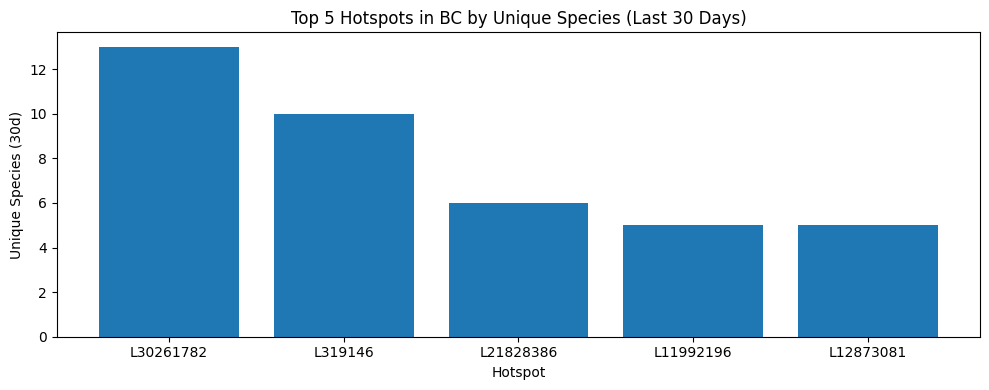

In [42]:
import matplotlib.pyplot as plt

def answer_question_4():
    # -------------------------------
    # Get hotspot list in BC
    # -------------------------------
    
    region_code = "CA-BC"

    # eBird API endpoint to get hotspots by region
    hotspot_list_endpoint = f"https://api.ebird.org/v2/ref/hotspot/{region_code}"

    # Request parameters (JSON format)
    params = {"fmt": "json"}
    
    headers = {"x-ebirdapitoken": API_KEY}

    hotspots = fetch_data(hotspot_list_endpoint, params, headers=headers)
    
    if not hotspots:
        return

    hotspot_df = pd.DataFrame(hotspots)

    # Check if locId column exists
    if "locId" not in hotspot_df.columns:
        print("Q4) locId not found in hotspot response.")
        display(hotspot_df.head())
        return

    # ------------------------------------------
    # Sample first 30 hotspots (for speed)
    # ------------------------------------------
    
    N = 30
    sample_hotspots = hotspot_df.head(N)

    results = []

    # ------------------------------------------
    # For each hotspot, get observations
    # ------------------------------------------

    for _, row in sample_hotspots.iterrows():
        loc_id = row["locId"]
        loc_name = row.get("locName", None)

        # API endpoint to get recent observations for a hotspot
        obs_endpoint = f"https://api.ebird.org/v2/data/obs/{loc_id}/recent"

        # Get observations from the last 30 days
        obs_params = {"back": 30, "maxResults": 10000}

        obs = fetch_data(obs_endpoint, obs_params, headers=headers)
        
        if not obs:
            continue

        obs_df = pd.DataFrame(obs)

        # Count number of unique species
        diversity = obs_df["speciesCode"].nunique() if "speciesCode" in obs_df.columns else 0

        # Save result for this hotspot
        results.append({
            "locId": loc_id,
            "locName": loc_name,
            "uniqueSpecies_30d": diversity,
        })

    # ------------------------------------------
    # Find Top 5 hotspots by diversity
    # ------------------------------------------

    res_df = pd.DataFrame(results).sort_values("uniqueSpecies_30d", ascending=False)
    print("Q4) Top 5 hotspots in BC by species diversity (last 30 days), sampled from first 30 hotspots:")
    top5 = res_df.head(5).copy()
    display(top5)

    # ------------------------------------------
    # Visualize Top 5 with a bar chart
    # ------------------------------------------
        
    # Use locId as label (short and clear)
    top5["label"] = top5["locId"]
    
    plt.figure(figsize=(10, 4))
    plt.bar(top5["label"], top5["uniqueSpecies_30d"])
    plt.title("Top 5 Hotspots in BC by Unique Species (Last 30 Days)")
    plt.xlabel("Hotspot")
    plt.ylabel("Unique Species (30d)")
    plt.xticks()
    plt.tight_layout()
    plt.show()

answer_question_4()


 ## Submission

 Complete this notebook, rename it to `A1-2.ipynb`, and submit it along with any necessary credentials or configuration files as `A1-2.zip` to Canvas.

 ## Submission Checklist



 - [ ] Completed notebook file (`A1-2.ipynb`).

 - [ ] Included API keys or other necessary credentials (if applicable).

 - [ ] Verified that questions and answers are documented with meaningful titles.

 - [ ] Optional visualizations are added to enhance insights.